In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_all = pd.read_csv('../data/util_payments_merged.csv')

In [3]:
df_all.head()

,npi,last_name,first_name,credentials,gender,city,state,provider_type,num_hcpcs,num_services,...,num_diabetes,num_heart_failure,num_hypertension,num_ischemic_heart,num_osteoporosis,num_rheumatoid_arthritis_osteoarthirtis,num_schizophrenia_psychotic,num_stroke,county,county_fips
0,1003000126,ENKESHAFI,ARDALAN,MD,M,CUMBERLAND,MD,Internal Medicine,22,1648,...,359.10,332.50,498.75,445.55,86.45,312.55,106.40,133.00,Allegany,24001
1,1003892589,GARROW,GEORGE,MD,M,CUMBERLAND,MD,Medical Oncology,10,67,...,15.96,NaN,41.04,34.77,NaN,18.81,NaN,NaN,Allegany,24001
2,1003951625,MATYASIK,STANLEY,DO,M,CUMBERLAND,MD,Pulmonary Disease,18,2914,...,294.69,307.23,470.25,401.28,81.51,313.50,62.70,81.51,Allegany,24001
3,1003975400,WILT,MARK,P A,M,CUMBERLAND,MD,Physician Assistant,33,177,...,57.50,63.75,93.75,93.75,NaN,66.25,NaN,11.25,Allegany,24001
4,1013224534,MORRIS,CONNIE,"MSN, CRNP, FNP-BC",F,LAVALE,MD,Nurse Practitioner,11,399,...,38.10,16.51,91.44,41.91,11.43,49.53,11.43,11.43,Allegany,24001


In [20]:
df_all[df_all['county']=='Baldwin']

,npi,last_name,first_name,credentials,gender,city,state,provider_type,num_hcpcs,num_services,...,num_hypertension,num_ischemic_heart,num_osteoporosis,num_rheumatoid_arthritis_osteoarthirtis,num_schizophrenia_psychotic,num_stroke,county,county_fips,total_age,total_hcc_risk
529703,1003858242,SCOTT,CAROL,MD,F,MILLEDGEVILLE,GA,Emergency Medicine,24,302,...,162.75,101.99,NaN,110.67,21.70,17.36,Baldwin,13009,14322,381.3558
529704,1013193549,RYAN,ASHLEY,MD,M,MILLEDGEVILLE,GA,Anesthesiology,16,43,...,30.00,14.00,NaN,12.00,NaN,0.00,Baldwin,13009,2600,58.9440
529705,1023111408,CAULTON,CHARLES,MD,M,MILLEDGEVILLE,GA,Family Practice,12,575,...,63.00,22.68,NaN,61.32,NaN,NaN,Baldwin,13009,5796,109.1496
529706,1033173505,RITCHIE,DAVID,OD,M,MILLEDGEVILLE,GA,Optometry,13,300,...,166.50,59.94,17.76,82.14,NaN,NaN,Baldwin,13009,15762,236.9628
529707,1033249081,JOHNSTON,MARIA,PT,F,MILLEDGEVILLE,GA,Physical Therapist,13,3382,...,56.25,15.75,NaN,54.75,NaN,NaN,Baldwin,13009,4950,72.6375
529708,1033406517,SANDERS,JULIE,None,F,MILLEDGEVILLE,GA,Nurse Practitioner,3,135,...,31.92,NaN,NaN,14.82,25.08,NaN,Baldwin,13009,2907,70.6344
529709,1033447610,GODDARD,KESHANA,APRN,F,MILLEDGEVILLE,GA,Nurse Practitioner,3,245,...,46.40,15.20,NaN,23.20,28.00,NaN,Baldwin,13009,4080,97.2080
529710,1033559653,ETHRIDGE,ANNA,NP-C,F,MILLEDGEVILLE,GA,Nurse Practitioner,8,86,...,59.76,24.90,NaN,34.86,14.11,NaN,Baldwin,13009,5146,106.9040
529711,1063503233,BHUTTA,TAYYAB,MD,M,MILLEDGEVILLE,GA,Internal Medicine,10,224,...,154.50,105.06,14.42,88.58,22.66,22.66,Baldwin,13009,14214,538.0102
529712,1063546877,WELCH,STEPHANIE,NP-C,F,MILLEDGEVILLE,GA,Nurse Practitioner,2,49,...,NaN,NaN,NaN,NaN,NaN,NaN,Baldwin,13009,650,17.9426


County/fips on index 878037 is incorrect. Ocean Springs, MS is in Jackson County through a Google search. A couple of others were obviously incorrect as well

In [45]:
df_all.ix[878037,'county'] = 'Jackson'
df_all.ix[878037, 'county_fips'] = 53520

In [46]:
df_all.iloc[878037]

npi                                              1194765776
last_name                                   O'KELLEY-HUGHES
first_name                                         PATRICIA
credentials                                              OD
gender                                                    F
city                                          OCEAN SPRINGS
state                                                    MS
provider_type                                     Optometry
num_hcpcs                                                22
num_services                                           1129
num_unique_bene                                         515
total_submitted_charges                              130453
total_medicare_allowed_amt                          97522.3
total_medicare_payment_amt                          66341.4
drug_suppress_indicator                                   0
num_hcpcs_associated_drug_srvc                            0
num_drug_srvc                           

In [49]:
df_all[df_all['county_fips']==56043]

,npi,last_name,first_name,credentials,gender,city,state,provider_type,num_hcpcs,num_services,...,num_hypertension,num_ischemic_heart,num_osteoporosis,num_rheumatoid_arthritis_osteoarthirtis,num_schizophrenia_psychotic,num_stroke,county,county_fips,total_age,total_hcc_risk
638830,1003979105,FRANK,HOWARD,MD,M,WORLAND,WY,Orthopedic Surgery,43,315,...,58.80,26.40,16.80,68.40,NaN,NaN,Washakie,56043,8880,118.8960
638831,1144296245,THURSTON,JOHN,MD,M,WORLAND,WY,Family Practice,168,7045,...,244.14,150.24,50.08,156.50,18.78,18.78,Washakie,56043,46324,541.4900
638832,1144349598,RADABAUGH,SARAH,DC,F,WORLAND,WY,Chiropractic,1,698,...,44.45,22.86,NaN,35.56,NaN,NaN,Washakie,56043,9271,85.9917
638833,1194895748,WILDE,BRADLEY,DC,M,WORLAND,WY,Chiropractic,2,192,...,NaN,NaN,NaN,NaN,NaN,NaN,Washakie,56043,2592,26.1396
638834,1225292303,ANDERS,DIANA,PA-C,F,WORLAND,WY,Physician Assistant,34,446,...,40.70,27.50,NaN,27.50,NaN,NaN,Washakie,56043,7920,91.3110
638835,1295773505,CLIFFORD,RYAN,MD,M,WORLAND,WY,Family Practice,9,69,...,39.00,13.20,NaN,34.80,NaN,0.00,Washakie,56043,4080,62.9340
638836,1295997013,WILDE,BENJAMIN,DO,M,WORLAND,WY,Family Practice,56,844,...,104.16,65.10,15.19,69.44,NaN,NaN,Washakie,56043,16058,214.1139
638837,1376781872,SHOLEY,THORMAN,OD,M,WORLAND,WY,Optometry,5,19,...,NaN,0.00,NaN,NaN,0.00,0.00,Washakie,56043,975,8.1432
638838,1386646669,ZIMMERMAN,EDWARD,MD,M,WORLAND,WY,Family Practice,16,624,...,55.50,28.50,NaN,36.00,NaN,NaN,Washakie,56043,10500,155.1450
638839,1407986243,SAUNDERS,CHAD,MD,M,WORLAND,WY,Internal Medicine,21,389,...,74.25,50.49,16.83,42.57,15.84,NaN,Washakie,56043,7524,146.2527


In [50]:
df_all.ix[638842,'county'] = 'Craighead'
df_all.ix[638842, 'county_fips'] = 35710

In [57]:
df_all.ix[114144,'state'] = 'WY'

In [56]:
df_all[(df_all['county_fips']==56021) & (df_all['state']!='WY')].T

,114144
npi,1932471133
last_name,GIRANY
first_name,JILL
credentials,FNP-C
gender,F
city,CHEYENNE
state,WA
provider_type,Nurse Practitioner
num_hcpcs,40
num_services,454


In [5]:
df_all['total_age'] = df_all['avg_age_bene'] * df_all['num_unique_bene']

In [6]:
df_all['total_hcc_risk'] = df_all['avg_hcc_risk_score'] * df_all['num_unique_bene']

In [8]:
df_all.columns

Index([u'npi', u'last_name', u'first_name', u'credentials', u'gender', u'city',
       u'state', u'provider_type', u'num_hcpcs', u'num_services',
       u'num_unique_bene', u'total_submitted_charges',
       u'total_medicare_allowed_amt', u'total_medicare_payment_amt',
       u'drug_suppress_indicator', u'num_hcpcs_associated_drug_srvc',
       u'num_drug_srvc', u'num_unique_bene_with_drug_srvc',
       u'total_drug_submitted_charges', u'total_drug_medicare_allowed_amt',
       u'total_drug_medicare_payment_amt', u'medical_suppress_indicator',
       u'num_hcpcs_associated_med_srvc', u'num_med_srvc',
       u'num_unique_bene_with_med_srvc', u'total_med_submitted_charges',
       u'total_med_medicare_allowed_amt', u'total_med_medicare_payment_amt',
       u'avg_age_bene', u'num_bene_le65', u'num_bene_65to74',
       u'num_bene_75to84', u'num_bene_ge84', u'num_female', u'num_male',
       u'num_non_his_white', u'num_african_american', u'num_asian',
       u'num_hispanic', u'num_american_

In [9]:
smash_cols = ['state',
              'num_hcpcs',
              'num_services',
              'num_unique_bene',
              'total_submitted_charges',
              'total_medicare_allowed_amt',
              'total_medicare_payment_amt',
              'total_drug_submitted_charges',
              'total_drug_medicare_allowed_amt',
              'total_drug_medicare_payment_amt',
              'num_hcpcs_associated_med_srvc',
              'num_med_srvc',
              'num_unique_bene_with_med_srvc',
              'total_med_submitted_charges',
              'total_med_medicare_allowed_amt',
              'total_med_medicare_payment_amt',
              'num_bene_le65', 
              'num_bene_65to74',
              'num_bene_75to84',
              'num_bene_ge84',
              'num_female',
              'num_male',
              'num_non_his_white',
              'num_african_american',
              'num_asian',
              'num_hispanic',
              'num_american_indian',
              'num_asthma',
              'num_alzheimers_dementia',
              'num_artrial_fibrillation',
              'num_cancer',
              'num_chronic_obstructive_pulmonary',
              'num_depression',
              'num_diabetes',
              'num_heart_failure',
              'num_hypertension',
              'num_ischemic_heart',
              'num_osteoporosis',
              'num_rheumatoid_arthritis_osteoarthirtis',
              'num_schizophrenia_psychotic',
              'num_stroke',
              'county',
              'county_fips',
              'total_age',
              'total_hcc_risk'
             ]

In [61]:
df_agg = df_all.groupby(['county_fips', 'county'])[smash_cols].sum()

In [62]:
df_agg[100:200]

,,num_hcpcs,num_services,num_unique_bene,total_submitted_charges,total_medicare_allowed_amt,total_medicare_payment_amt,total_drug_submitted_charges,total_drug_medicare_allowed_amt,total_drug_medicare_payment_amt,num_hcpcs_associated_med_srvc,...,num_heart_failure,num_hypertension,num_ischemic_heart,num_osteoporosis,num_rheumatoid_arthritis_osteoarthirtis,num_schizophrenia_psychotic,num_stroke,county_fips,total_age,total_hcc_risk
county_fips,county,,,,,,,,,,,,,,,,,,,,,
4019,Pima,108465,6701629.4,905452,8.414905e+08,3.387607e+08,2.577087e+08,1.465819e+08,5.826423e+07,4.569892e+07,90733,...,186329.40,600988.78,330648.30,89162.09,361284.06,28545.17,56087.49,11835955,66718859,1320905.1651
4021,Pinal,5798,385987.5,50362,4.804424e+07,1.956493e+07,1.457233e+07,8.090158e+06,2.695469e+06,2.082680e+06,4289,...,9159.03,33390.09,17998.81,3632.59,20972.13,1414.11,2859.83,788116,3635779,67159.8293
4023,Santa Cruz,801,18881.0,4410,2.800133e+06,1.574893e+06,1.145050e+06,2.523284e+04,1.201586e+04,1.002460e+04,426,...,518.79,2777.43,1311.05,112.85,1207.89,36.05,96.34,124713,320286,5494.7225
4025,Yavapai,21579,2051771.0,273743,2.307584e+08,9.697417e+07,7.285839e+07,3.832822e+07,1.193607e+07,9.354572e+06,18180,...,44847.70,177696.71,100997.26,30694.84,117679.83,5955.60,16158.08,2402925,20264514,330404.3876
4027,Yuma,11610,1009592.0,143866,1.535136e+08,6.252630e+07,4.697410e+07,8.328865e+06,3.902643e+06,3.077839e+06,9600,...,33233.46,103543.32,66930.53,15627.51,62283.09,3388.22,10695.23,1232262,10681811,207612.3140
5001,Arkansas,552,28669.0,4769,3.109161e+06,1.333736e+06,9.835295e+05,3.654800e+04,9.697300e+03,8.325000e+03,454,...,1225.42,3144.20,2117.86,326.42,1723.59,218.42,369.04,105021,347760,5980.2471
5003,Ashley,830,42494.0,6301,4.259072e+06,1.864243e+06,1.350365e+06,6.527161e+04,2.414887e+04,2.130210e+04,755,...,1368.26,4106.64,2827.63,430.29,1943.03,482.90,352.54,105063,445192,7926.9778
5005,Baxter,10455,765893.5,112097,8.070812e+07,3.688272e+07,2.771100e+07,6.650776e+06,3.563427e+06,2.809330e+06,9022,...,23586.23,77621.52,43834.34,9915.78,47030.54,4065.69,6513.62,800800,8114680,142077.1577
5007,Benton,20097,1048142.4,156965,1.110579e+08,4.588339e+07,3.424238e+07,1.105109e+07,6.837456e+06,5.291834e+06,16709,...,36893.04,109271.98,73880.18,17741.02,67773.25,7868.59,10808.49,2258157,11381560,211334.9297


In [63]:
df_agg.to_csv('../data/county_agg.csv', index=False)

In [65]:
df_agg.describe().T

,count,mean,std,min,25%,50%,75%,max
num_hcpcs,3050,10150.956066,3.039977e+04,1.0000,302.25000,1259.00000,6006.250000,6.297110e+05
num_services,3050,632044.209082,2.033095e+06,13.0000,11693.00000,54431.25000,317603.750000,4.615261e+07
num_unique_bene,3050,101790.358361,3.115819e+05,12.0000,2171.00000,9421.00000,57690.000000,6.337634e+06
total_submitted_charges,3050,85320021.294790,2.960533e+08,333.0000,1046628.05250,5595548.01000,40909819.050000,6.830780e+09
total_medicare_allowed_amt,3050,32466054.711141,1.113585e+08,117.6200,515525.71500,2463304.48500,16311893.125000,2.730312e+09
total_medicare_payment_amt,3050,24539495.548931,8.483870e+07,83.3700,372334.04500,1769485.94000,12248883.524992,2.093957e+09
total_drug_submitted_charges,3033,8057631.340663,2.896595e+07,0.0000,12233.00000,106462.18000,1994044.290000,5.761719e+08
total_drug_medicare_allowed_amt,3033,3772179.555503,1.316157e+07,0.0000,4217.62000,43981.40000,944419.770000,2.394802e+08
total_drug_medicare_payment_amt,3033,2948678.060541,1.028595e+07,0.0000,3701.44000,37342.18000,742556.690000,1.883756e+08
num_hcpcs_associated_med_srvc,3033,8521.574679,2.551157e+04,1.0000,241.00000,1030.00000,5149.000000,5.212960e+05


In [66]:
df_agg.shape

(3050, 43)

(0, 2000000)

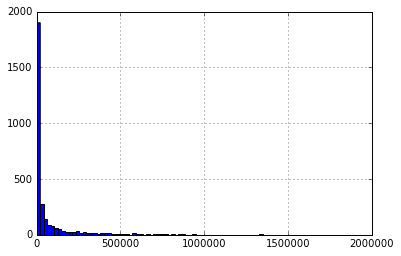

In [69]:
df_agg['num_unique_bene'].hist(bins=300)
plt.xlim(0,2000000)

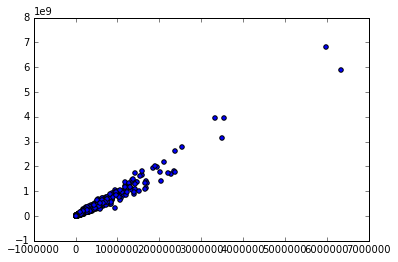

In [74]:
plt.scatter(df_agg['num_unique_bene'], df_agg['total_submitted_charges'])

In [82]:
df_agg[df_agg['total_submitted_charges']>2800000000]

,,num_hcpcs,num_services,num_unique_bene,total_submitted_charges,total_medicare_allowed_amt,total_medicare_payment_amt,total_drug_submitted_charges,total_drug_medicare_allowed_amt,total_drug_medicare_payment_amt,num_hcpcs_associated_med_srvc,...,num_heart_failure,num_hypertension,num_ischemic_heart,num_osteoporosis,num_rheumatoid_arthritis_osteoarthirtis,num_schizophrenia_psychotic,num_stroke,county_fips,total_age,total_hcc_risk
county_fips,county,,,,,,,,,,,,,,,,,,,,,
4013,Maricopa,359139,27885667.6,3499948,3.144730e+09,1.360772e+09,1.033330e+09,3.767016e+08,1.954453e+08,1.522197e+08,293767,...,751328.15,2385625.45,1417769.69,344458.89,1583941.55,108963.90,278161.91,44841262,255972382,5464095.1216
6037,Los Angeles,629711,46152614.6,5991823,6.830780e+09,2.730312e+09,2.093957e+09,5.761719e+08,2.394802e+08,1.883756e+08,521296,...,1917220.96,4252735.21,3001307.85,847834.78,2988228.00,539276.96,528265.17,116085473,440215605,11937368.6362
17031,Cook,546147,35530218.1,6337634,5.881705e+09,2.111182e+09,1.601108e+09,5.444538e+08,2.247927e+08,1.759619e+08,463997,...,2040055.44,4539861.09,2930718.52,687762.86,3167455.20,510540.75,616924.47,293358975,463349808,11512158.7252
36061,New York,304448,18206877.5,3338746,3.942714e+09,1.202521e+09,9.211079e+08,1.701899e+08,9.379544e+07,7.379399e+07,252178,...,956329.85,2252974.28,1649807.37,435765.62,1479611.59,147109.16,250100.71,446687607,245327512,5809640.4182
48201,Harris,362190,20964411.2,3538737,3.938987e+09,1.240912e+09,9.402302e+08,3.637955e+08,1.487715e+08,1.149723e+08,306944,...,1185219.59,2563193.13,1782902.58,361410.79,1557794.47,255288.97,394430.00,538646175,253431282,7194688.9905


In [83]:
df_ranks = pd.read_csv('../data/county_health_ranks.csv')

In [85]:
df_ranks.head()

,FIPS,State,County,Z-Score,Rank,Z-Score.1,Rank.1,zip,county_fip
0,1001,Alabama,Autauga,-0.60225,15,-0.503973,9,36006,1001
1,1001,Alabama,Autauga,-0.60225,15,-0.503973,9,36003,1001
2,1001,Alabama,Autauga,-0.60225,15,-0.503973,9,36067,1001
3,1001,Alabama,Autauga,-0.60225,15,-0.503973,9,36066,1001
4,1001,Alabama,Autauga,-0.60225,15,-0.503973,9,36051,1001


In [87]:
df_ranks = pd.read_excel('../data/2013CountyHealthRankingsNationalData.xls', sheetname=1, header=1)

In [88]:
df_ranks.head()

,FIPS,State,County,Z-Score,Rank,Z-Score.1,Rank.1
0,1000,Alabama,NaN,NaN,NaN,NaN,NaN
1,1001,Alabama,Autauga,-0.602250,15,-0.503973,9
2,1003,Alabama,Baldwin,-1.352926,2,-0.803070,4
3,1005,Alabama,Barbour,-0.029855,33,0.388564,57
4,1007,Alabama,Bibb,0.638328,53,0.291682,52


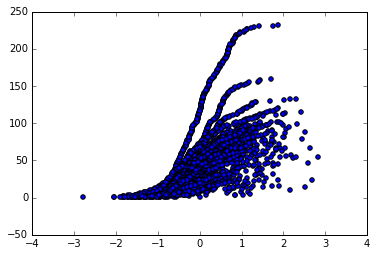

In [89]:
plt.scatter(df_ranks['Z-Score'], df_ranks['Rank'])

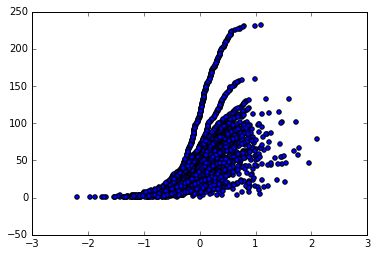

In [90]:
plt.scatter(df_ranks['Z-Score.1'], df_ranks['Rank.1'])

z-scores/ranks for outcomes and factors rankings are per state (sheet 1)

In [114]:
df_full_ranks = pd.read_excel('../data/Copy of 2013CountyHealthRankingsNationalData.xlsx', sheetname=3, header=[0,1])

In [115]:
df_full_ranks.shape

(3192, 56)

In [116]:
df_full_ranks.columns.values

array([ (u'*Data for measures with an asterisk should not be compared with prior years due to changes in definition.', u'State'),
       (u'*Data for measures with an asterisk should not be compared with prior years due to changes in definition.', u'County'),
       (u'Premature death (Years of Potential Life Lost)', u'YPLL Rate'),
       (u'Premature death (Years of Potential Life Lost)', u'Z-Score'),
       (u'Poor or fair health', u'% Fair/Poor'),
       (u'Poor or fair health', u'Z-Score'),
       (u'Poor physical health days', u'Physically Unhealthy Days'),
       (u'Poor physical health days', u'Z-Score'),
       (u'Poor mental health days', u'Mentally Unhealthy Days'),
       (u'Poor mental health days', u'Z-Score'),
       (u'Low Birth Weight', u'% LBW'), (u'Low Birth Weight', u'Z-Score'),
       (u'Smokers', u'% Smokers'), (u'Smokers', u'Z-Score'),
       (u'Adult obesity', u'% Obese'), (u'Adult obesity', u'Z-Score'),
       (u'Physical inactivity', u'% Physically Inactive'),


In [117]:
df_full_ranks.columns = ['_'.join(col).strip() for col in df_full_ranks.columns.values]

In [118]:
for i in df_full_ranks.columns:
    print i

*Data for measures with an asterisk should not be compared with prior years due to changes in definition._State
*Data for measures with an asterisk should not be compared with prior years due to changes in definition._County
Premature death (Years of Potential Life Lost)_YPLL Rate
Premature death (Years of Potential Life Lost)_Z-Score
Poor or fair health_% Fair/Poor
Poor or fair health_Z-Score
Poor physical health days_Physically Unhealthy Days
Poor physical health days_Z-Score
Poor mental health days_Mentally Unhealthy Days
Poor mental health days_Z-Score
Low Birth Weight_% LBW
Low Birth Weight_Z-Score
Smokers_% Smokers
Smokers_Z-Score
Adult obesity_% Obese
Adult obesity_Z-Score
Physical inactivity_% Physically Inactive
Physical inactivity_Z-Score
Excessive Drinking_% Excessive Drinking
Excessive Drinking_Z-Score
Motor Vehicle Mortality_MV Mortality Rate
Motor Vehicle Mortality_Z-Score
Sexually Transmitted Diseases_Chlamydia Rate
Sexually Transmitted Diseases_Z-Score
Teen Birth Rate_T

In [109]:
df_full_ranks.head()

,*Data for measures with an asterisk should not be compared with prior years due to changes in definition._State,*Data for measures with an asterisk should not be compared with prior years due to changes in definition._County,Premature death (Years of Potential Life Lost)_Deaths,Premature death (Years of Potential Life Lost)_YPLL Rate,Premature death (Years of Potential Life Lost)_95% CI - Low,Premature death (Years of Potential Life Lost)_95% CI - High,Premature death (Years of Potential Life Lost)_Z-Score,Poor or fair health_Sample Size,Poor or fair health_% Fair/Poor,Poor or fair health_95% CI - Low,...,Drinking water safety_Z-Score,Access to recreational facilities_# Rec Facilities,Access to recreational facilities_Rec Facility Rate,Access to recreational facilities_Z-Score,Limited access to healthy foods*_# Limited Access,Limited access to healthy foods*_% Limited Access,Limited access to healthy foods*_Z-Score,Fast food restaurants_# Fast Foods,Fast food restaurants_% Fast Foods,Fast food restaurants_Z-Score
1000,Alabama,NaN,70721,9608.90,9509.469,9708.331,NaN,41125,20.1,19.6,...,NaN,349,7.293015,NaN,367290.199330,7.675223,NaN,3286,53.807107,NaN
1001,Alabama,Autauga,729,8376.42,7522.076,9230.764,-1.135994,383,23.2,18.2,...,-0.312314,4,7.321046,-0.672309,5344.427472,9.793530,0.406342,36,52.173913,0.031688
1003,Alabama,Baldwin,2325,7770.16,7291.646,8248.674,-1.474250,1526,12.5,10.6,...,0.482953,16,8.730813,-1.013484,9952.144027,5.460261,-0.291109,112,35.443038,-1.625420
1005,Alabama,Barbour,422,9458.14,8107.935,10808.345,-0.532461,377,22.4,17.6,...,0.472313,1,3.650968,0.215879,3135.676086,11.420316,0.668178,19,55.882353,0.398990
1007,Alabama,Bibb,390,11543.90,9945.206,13142.594,0.631264,330,21.0,15.8,...,-0.312314,1,4.370629,0.041715,491.449066,2.144661,-0.824763,5,45.454545,-0.633831


In [128]:
df_full_ranks.rename(columns={'*Data for measures with an asterisk should not be compared with prior years due to changes in definition._State': 'state'}, inplace=True)
df_full_ranks.rename(columns={'*Data for measures with an asterisk should not be compared with prior years due to changes in definition._County': 'county'}, inplace=True)

In [129]:
df_full_ranks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3192 entries, 1000 to 56045
Data columns (total 56 columns):
state                                                                          3192 non-null object
county                                                                         3141 non-null object
Premature death (Years of Potential Life Lost)_YPLL Rate                       3038 non-null float64
Premature death (Years of Potential Life Lost)_Z-Score                         3053 non-null float64
Poor or fair health_% Fair/Poor                                                2794 non-null float64
Poor or fair health_Z-Score                                                    3053 non-null float64
Poor physical health days_Physically Unhealthy Days                            2948 non-null float64
Poor physical health days_Z-Score                                              3053 non-null float64
Poor mental health days_Mentally Unhealthy Days                                2913

In [138]:
def norm_agg_payments(df):
    """
    Takes pandas df of county aggregated data and normalizes/cleans necessary columns (by unique_bene)
    """

    sum_cols = ['num_hcpcs',
                'num_services',
                'total_submitted_charges',
                'total_medicare_allowed_amt',
                'total_medicare_payment_amt',
                #'num_hcpcs_associated_drug_srvc',
                #'num_drug_srvc',
                #'num_unique_bene_with_drug_srvc',
                'total_drug_submitted_charges', 
                'total_drug_medicare_allowed_amt',
                'total_drug_medicare_payment_amt',
                'num_hcpcs_associated_med_srvc',
                'num_med_srvc', 
                'num_unique_bene_with_med_srvc', 
                'total_med_submitted_charges',
                'total_med_medicare_allowed_amt', 
                'total_med_medicare_payment_amt',
                'num_bene_le65',
                'num_bene_65to74',
                'num_bene_75to84',
                'num_bene_ge84', 
                'num_female', 
                'num_male',
                'num_non_his_white',
                'num_african_american',
                'num_asian',
                'num_hispanic', 
                'num_american_indian', 
                #'num_no_race',
                'num_asthma', 
                'num_alzheimers_dementia',
                'num_artrial_fibrillation',
                'num_cancer',
                'num_chronic_obstructive_pulmonary',
                'num_depression',
                'num_diabetes',
                'num_heart_failure',
                'num_hypertension',
                'num_ischemic_heart',
                'num_osteoporosis',
                'num_rheumatoid_arthritis_osteoarthirtis',
                'num_schizophrenia_psychotic',
                'num_stroke',
                'total_age',
                'total_hcc_risk'
                ]
    for name in sum_cols:
        df['{}_norm'.format(name)] = df[name].divide(df['num_unique_bene']) 

In [140]:
norm_agg_payments(df_agg)

In [141]:
df_agg.columns

Index([u'num_hcpcs', u'num_services', u'num_unique_bene',
       u'total_submitted_charges', u'total_medicare_allowed_amt',
       u'total_medicare_payment_amt', u'total_drug_submitted_charges',
       u'total_drug_medicare_allowed_amt', u'total_drug_medicare_payment_amt',
       u'num_hcpcs_associated_med_srvc', u'num_med_srvc',
       u'num_unique_bene_with_med_srvc', u'total_med_submitted_charges',
       u'total_med_medicare_allowed_amt', u'total_med_medicare_payment_amt',
       u'num_bene_le65', u'num_bene_65to74', u'num_bene_75to84',
       u'num_bene_ge84', u'num_female', u'num_male', u'num_non_his_white',
       u'num_african_american', u'num_asian', u'num_hispanic',
       u'num_american_indian', u'num_asthma', u'num_alzheimers_dementia',
       u'num_artrial_fibrillation', u'num_cancer',
       u'num_chronic_obstructive_pulmonary', u'num_depression',
       u'num_diabetes', u'num_heart_failure', u'num_hypertension',
       u'num_ischemic_heart', u'num_osteoporosis',
       u

In [142]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3050 entries, (1001, Autauga) to (56045, Weston)
Data columns (total 84 columns):
num_hcpcs                                       3050 non-null int64
num_services                                    3050 non-null float64
num_unique_bene                                 3050 non-null int64
total_submitted_charges                         3050 non-null float64
total_medicare_allowed_amt                      3050 non-null float64
total_medicare_payment_amt                      3050 non-null float64
total_drug_submitted_charges                    3033 non-null float64
total_drug_medicare_allowed_amt                 3033 non-null float64
total_drug_medicare_payment_amt                 3033 non-null float64
num_hcpcs_associated_med_srvc                   3033 non-null float64
num_med_srvc                                    3033 non-null float64
num_unique_bene_with_med_srvc                   3033 non-null float64
total_med_submitted_charges     

In [144]:
df_agg.head()

,,num_hcpcs,num_services,num_unique_bene,total_submitted_charges,total_medicare_allowed_amt,total_medicare_payment_amt,total_drug_submitted_charges,total_drug_medicare_allowed_amt,total_drug_medicare_payment_amt,num_hcpcs_associated_med_srvc,...,num_diabetes_norm,num_heart_failure_norm,num_hypertension_norm,num_ischemic_heart_norm,num_osteoporosis_norm,num_rheumatoid_arthritis_osteoarthirtis_norm,num_schizophrenia_psychotic_norm,num_stroke_norm,total_age_norm,total_hcc_risk_norm
county_fips,county,,,,,,,,,,,,,,,,,,,,,
1001,Autauga,2057,120187.0,20422,1.145194e+07,5956382.03,4324099.62,244226.92,73437.42,62030.85,1661,...,0.378132,0.234742,0.699302,0.375258,0.069710,0.407612,0.052561,0.079124,71.204192,1.396064
1003,Baldwin,19299,1163082.5,175932,1.266541e+08,55270877.03,41193530.17,10607775.70,5245876.44,4107579.47,15949,...,0.306459,0.206900,0.715701,0.431138,0.078749,0.482307,0.042576,0.069872,72.597418,1.263246
1005,Barbour,1232,66673.0,10459,6.497972e+06,3083129.17,2230230.81,118654.44,47520.71,42734.62,1001,...,0.388831,0.174367,0.725549,0.310711,0.055133,0.371228,0.080574,0.056023,68.487523,1.276637
1007,Bibb,230,7221.0,1863,4.401974e+05,324498.09,223085.76,2457.00,1977.55,1922.51,150,...,0.380612,0.216608,0.738352,0.299656,0.050424,0.415309,0.061202,0.073323,72.056361,1.263420
1009,Blount,751,28179.0,6268,3.236438e+06,1375023.41,994906.69,43170.07,17335.15,16080.00,554,...,0.375330,0.266669,0.733709,0.428669,0.072650,0.404520,0.056010,0.065534,70.764040,1.381137


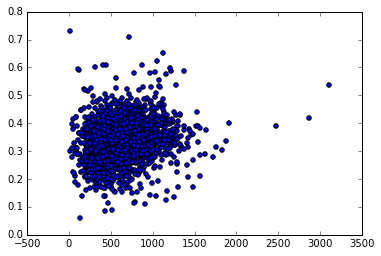

In [145]:
plt.scatter(df_agg['total_submitted_charges_norm'], df_agg['num_diabetes_norm'])

(array([  14.,   24.,   42.,   82.,  140.,  179.,  244.,  302.,  325.,
         326.,  311.,  257.,  210.,  172.,  111.,   86.,   64.,   38.,
          28.,   36.,   18.,   10.,    7.,    5.,    6.,    3.,    1.,
           1.,    1.,    1.,    2.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.,    1.]),
 array([   15.13636364,    77.00385685,   138.87135006,   200.73884327,
          262.60633648,   324.47382969,   386.3413229 ,   448.20881611,
          510.07630932,   571.94380253,   633.81129574,   695.67878895,
          757.54628216,   819.41377537,   881.28126858,   943.14876179,
         1005.016255  ,  1066.88374821,  1128.75124142,  1190.61873463,
         1252.48622784,  1314.35372105,  1376.22121426,  1438.08870747,
         1499.95620068,  1561.82369389,  1623.6911871 ,  1685.55868031,
         1747.42617352,  1809.29366673,  1871.16115994,  1933.02865315,
         1994.89614636, 

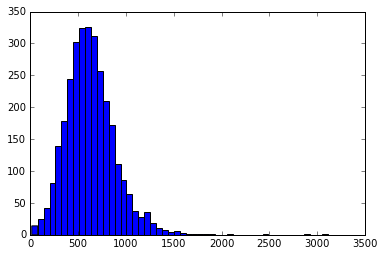

In [147]:
plt.hist(df_agg['total_submitted_charges_norm'], bins=50)

In [151]:
disease_norm = ['num_asthma', 
                'num_alzheimers_dementia',
                'num_artrial_fibrillation',
                'num_cancer',
                'num_chronic_obstructive_pulmonary',
                'num_depression',
                'num_diabetes',
                'num_heart_failure',
                'num_hypertension',
                'num_ischemic_heart',
                'num_osteoporosis',
                'num_rheumatoid_arthritis_osteoarthirtis',
                'num_schizophrenia_psychotic',
                'num_stroke',
                'total_age',
                'total_hcc_risk']

In [152]:
for i, name in enumerate(disease_norm):
    disease_norm[i] = '{}_norm'.format(name)

In [153]:
disease_norm

['num_asthma_norm',
 'num_alzheimers_dementia_norm',
 'num_artrial_fibrillation_norm',
 'num_cancer_norm',
 'num_chronic_obstructive_pulmonary_norm',
 'num_depression_norm',
 'num_diabetes_norm',
 'num_heart_failure_norm',
 'num_hypertension_norm',
 'num_ischemic_heart_norm',
 'num_osteoporosis_norm',
 'num_rheumatoid_arthritis_osteoarthirtis_norm',
 'num_schizophrenia_psychotic_norm',
 'num_stroke_norm',
 'total_age_norm',
 'total_hcc_risk_norm']

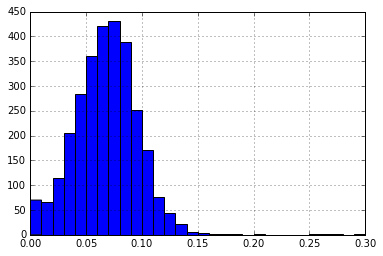

In [158]:
df_agg['num_asthma_norm'].hist(bins=30)

AttributeError: max must be larger than min in range parameter.

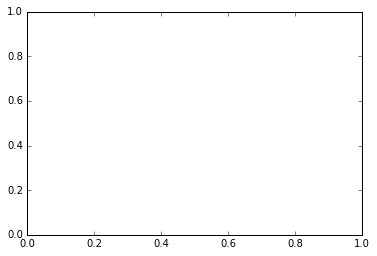

In [156]:
plt.hist(df_agg['num_asthma_norm'])

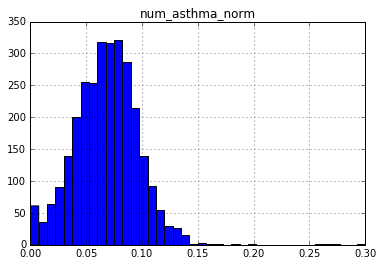

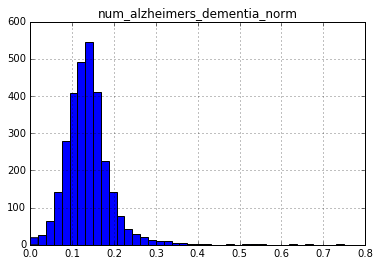

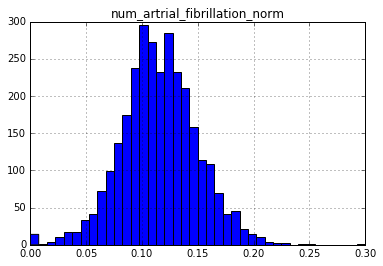

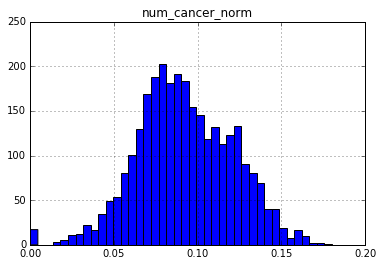

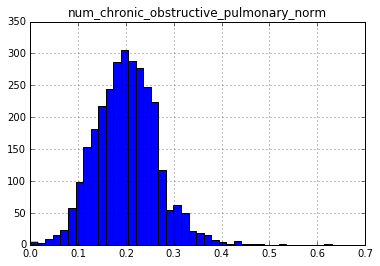

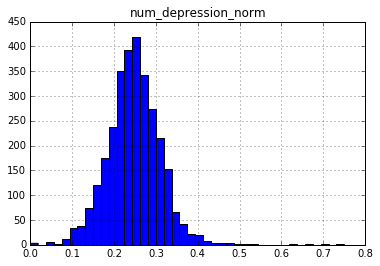

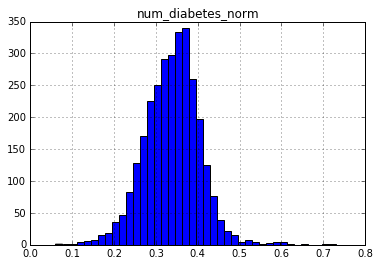

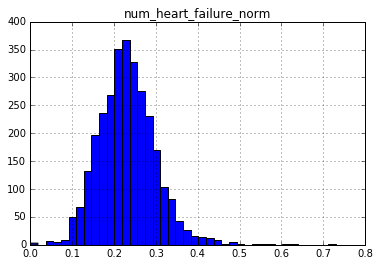

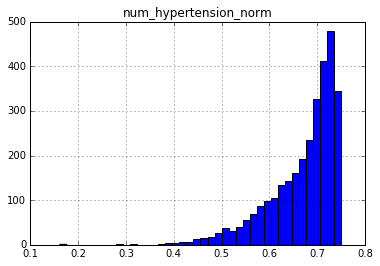

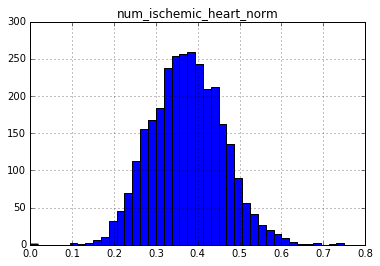

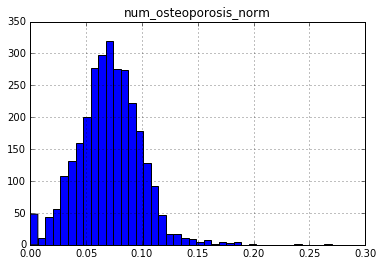

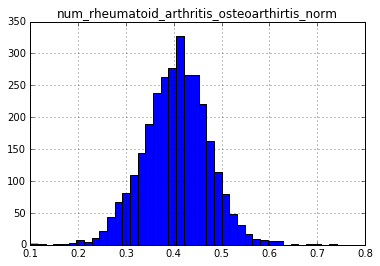

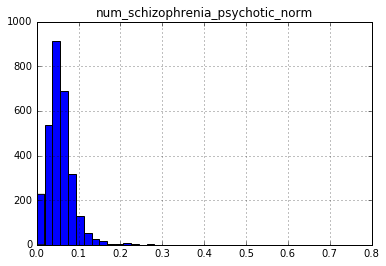

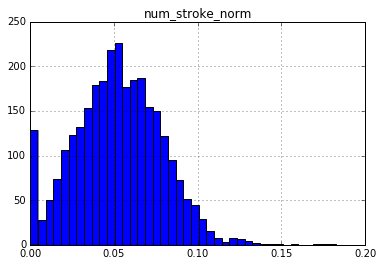

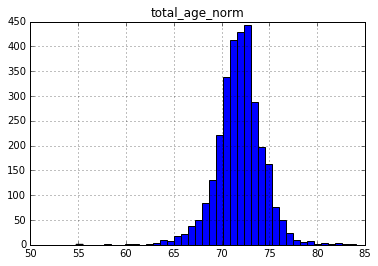

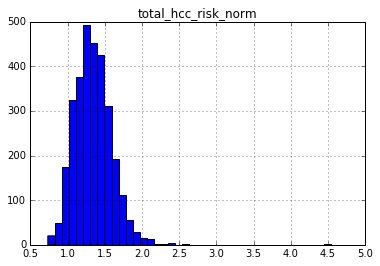

In [161]:
for i in disease_norm:
    df_agg[i].hist(bins=40)
    plt.title(i)
    plt.show()

In [163]:
from pandas.tools.plotting import scatter_matrix

In [164]:
disease_norm.append('total_submitted_charges')

In [170]:
len(disease_norm)

17

In [172]:
scatter_list_1 = disease_norm[0:8]
scatter_list_2 = disease_norm[8:17]

In [173]:
scatter_list_1.append('total_submitted_charges_norm')

In [175]:
scatter_list_2[-1] = 'total_submitted_charges_norm'

In [176]:
scatter_list_1

['num_asthma_norm',
 'num_alzheimers_dementia_norm',
 'num_artrial_fibrillation_norm',
 'num_cancer_norm',
 'num_chronic_obstructive_pulmonary_norm',
 'num_depression_norm',
 'num_diabetes_norm',
 'num_heart_failure_norm',
 'total_submitted_charges_norm']

In [177]:
scatter_list_2

['num_hypertension_norm',
 'num_ischemic_heart_norm',
 'num_osteoporosis_norm',
 'num_rheumatoid_arthritis_osteoarthirtis_norm',
 'num_schizophrenia_psychotic_norm',
 'num_stroke_norm',
 'total_age_norm',
 'total_hcc_risk_norm',
 'total_submitted_charges_norm']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f331fa06c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f33191749d0>]], dtype=object)

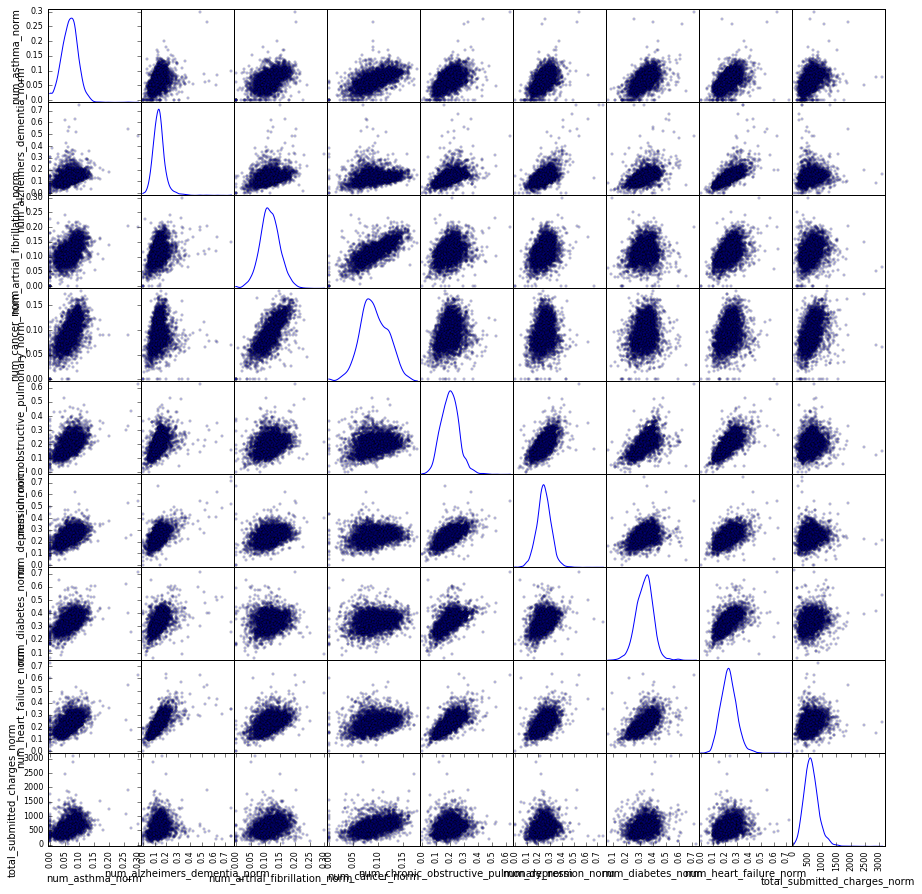

In [179]:
scatter_matrix(df_agg[scatter_list_1], alpha=0.2, figsize=(15, 15), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f331b842410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3315ef75d0>]], dtype=object)

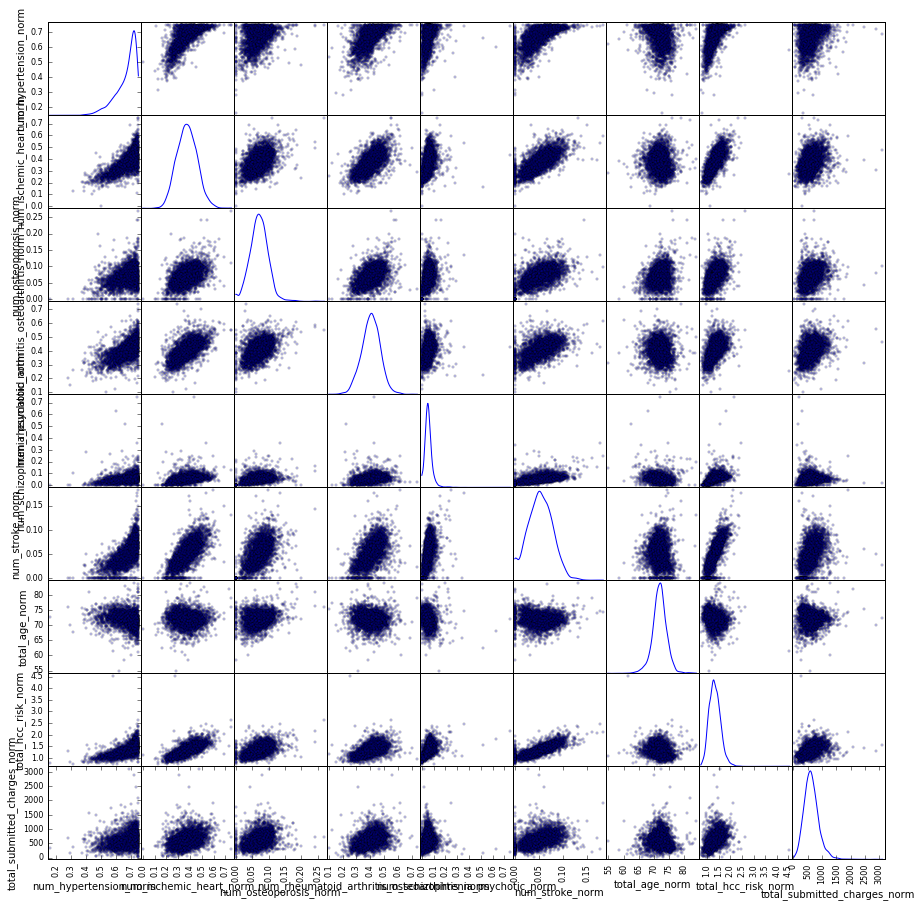

In [180]:
scatter_matrix(df_agg[scatter_list_2], alpha=0.2, figsize=(15, 15), diagonal='kde')

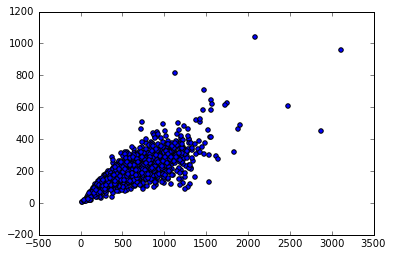

In [181]:
plt.scatter(df_agg['total_submitted_charges_norm'], df_agg['total_medicare_payment_amt_norm'])

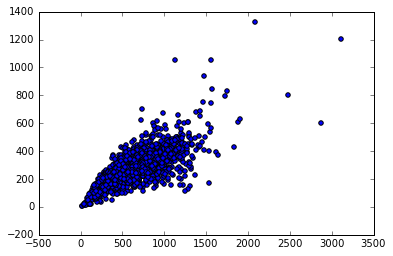

In [182]:
plt.scatter(df_agg['total_submitted_charges_norm'], df_agg['total_medicare_allowed_amt_norm'])

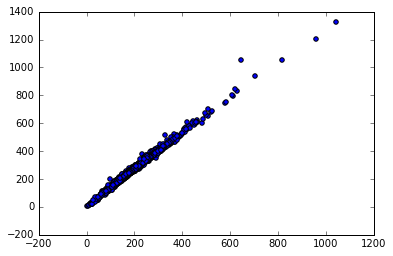

In [183]:
plt.scatter(df_agg['total_medicare_payment_amt_norm'], df_agg['total_medicare_allowed_amt_norm'])

In [185]:
for i in df_agg.columns:
    print "'{}'".format(i)

'num_hcpcs'
'num_services'
'num_unique_bene'
'total_submitted_charges'
'total_medicare_allowed_amt'
'total_medicare_payment_amt'
'total_drug_submitted_charges'
'total_drug_medicare_allowed_amt'
'total_drug_medicare_payment_amt'
'num_hcpcs_associated_med_srvc'
'num_med_srvc'
'num_unique_bene_with_med_srvc'
'total_med_submitted_charges'
'total_med_medicare_allowed_amt'
'total_med_medicare_payment_amt'
'num_bene_le65'
'num_bene_65to74'
'num_bene_75to84'
'num_bene_ge84'
'num_female'
'num_male'
'num_non_his_white'
'num_african_american'
'num_asian'
'num_hispanic'
'num_american_indian'
'num_asthma'
'num_alzheimers_dementia'
'num_artrial_fibrillation'
'num_cancer'
'num_chronic_obstructive_pulmonary'
'num_depression'
'num_diabetes'
'num_heart_failure'
'num_hypertension'
'num_ischemic_heart'
'num_osteoporosis'
'num_rheumatoid_arthritis_osteoarthirtis'
'num_schizophrenia_psychotic'
'num_stroke'
'county_fips'
'total_age'
'total_hcc_risk'
'num_hcpcs_norm'
'num_services_norm'
'total_submitted_charg

In [186]:
df_full_ranks.columns

Index([                                                                      u'state',
                                                                            u'county',
                          u'Premature death (Years of Potential Life Lost)_YPLL Rate',
                            u'Premature death (Years of Potential Life Lost)_Z-Score',
                                                   u'Poor or fair health_% Fair/Poor',
                                                       u'Poor or fair health_Z-Score',
                               u'Poor physical health days_Physically Unhealthy Days',
                                                 u'Poor physical health days_Z-Score',
                                   u'Poor mental health days_Mentally Unhealthy Days',
                                                   u'Poor mental health days_Z-Score',
                                                            u'Low Birth Weight_% LBW',
                                           

In [188]:
for i in df_full_ranks.columns:
    print "'{}',".format(i)

'state',
'county',
'Premature death (Years of Potential Life Lost)_YPLL Rate',
'Premature death (Years of Potential Life Lost)_Z-Score',
'Poor or fair health_% Fair/Poor',
'Poor or fair health_Z-Score',
'Poor physical health days_Physically Unhealthy Days',
'Poor physical health days_Z-Score',
'Poor mental health days_Mentally Unhealthy Days',
'Poor mental health days_Z-Score',
'Low Birth Weight_% LBW',
'Low Birth Weight_Z-Score',
'Smokers_% Smokers',
'Smokers_Z-Score',
'Adult obesity_% Obese',
'Adult obesity_Z-Score',
'Physical inactivity_% Physically Inactive',
'Physical inactivity_Z-Score',
'Excessive Drinking_% Excessive Drinking',
'Excessive Drinking_Z-Score',
'Motor Vehicle Mortality_MV Mortality Rate',
'Motor Vehicle Mortality_Z-Score',
'Sexually Transmitted Diseases_Chlamydia Rate',
'Sexually Transmitted Diseases_Z-Score',
'Teen Birth Rate_Teen Birth Rate',
'Teen Birth Rate_Z-Score',
'Uninsured_% Uninsured',
'Uninsured_Z-Score',
'Primary Care_PCP Ratio',
'Primary Care_Z-Score',